# BUSINESS UNDERSTANDING

## Descrição da abordagem do ponto de vista de negócio

Um dos maiores desafios de empresas que prestam serviços por assinatura é oferecer os serviços adequados, com o melhor preço para se manter a base de clientes satisfeita e fidelizada, ao mesmo tempo em que se quer maximizar a receita da companhia.

Sendo assim, esse trabalho visa entender como é o perfil dos clientes associados aos casos de churn, para se tomar ações para retê-los. Além disso, esse trabalho também visa avaliar como o consumo dos diferentes serviços estão associados entre si, para oferecer aos clientes condições que favoreçam a aquisição de novos serviços e assim aumentar a receita.

# DATA UNDERSTANDING

## Descrição da Base de Dados

A base de dados utilizada nesse trabalho está prersente no [kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) e contém informações de uma empresa de telecomunicações fictícia que provê serviços de telefone e internet. Cada registro corresponde a um cliente dessa empresa, com informações demográficas, infromações sobre o seu contrato e informações sobre os serviços assinados. Em sua totalidade, a base de dados possui 7043 registros de clientes.


## Variáveis Aleatórias

### Descrição das Colunas

| Coluna        | Descrição                     | Tipo de Dado              |
|--------------|---------------------------------|--------------------|
| customerID | ID do Cliente          | String     |
| gender    | Se o cliente é homem ou mulher              | String  |
| SeniorCitizen    | Se o cliente é um cidadão sênior ou não               | Integer|
| Partner    | Se o cliente tem um parceiro ou não            | String         |
| Dependents    | Se o cliente possui dependentes ou não                   | String |
| tenure    | Número de meses que o cliente está com a companhia             |  Integer     |
| PhoneService    | Se o cliente possui o serviço de telefone ou não                     | String|
| MultipleLines    | Se o cliente possui o serviço de multiplas linhas ou não                     | String|
| InternetService    | Qual o tipo de serviço de internet do cliente                     | String|
| OnlineSecurity    | Se o cliente possui o serviço de segurança online ou não                     | String|
| OnlineBackup    | Se o cliente possui o serviço de backup online ou não                     | String|
| DeviceProtection    | Se o cliente possui o serviço de proteção de dispositivo ou não                     | String|
| TechSuport    | Se o cliente possui o serviço de suporte técnico ou não                     | String|
| StreamingTV    | Se o cliente possui o serviço de streaming de TV ou não                     | String|
| StreamingMovies    | Se o cliente possui o serviço de streaming de filmes ou não                     | String|
| Contract    | Quais são os termos de contrato do cliente                     | String|
| PaperlessBilling    | Se o cliente possui o serviço de cobrança sem papel ou não                     | String|
| PaymentMethod    | Qual o método de pagamento do cliente                     | String|
| MonthlyCharges    | Valor cobrado mensalmente do cliente                     | Float|
| TotalCharges    | Valor total cobrado do cliente                    | Float|
| Churn    | Se o cliente se desligou ou não                     | String|

### Curadoria dos Dados

Para a curadoria dos dados, as seguinte medidas foram tomadas:
- Excluiu-se a variável `customerID`, pois não acrescentava qualquer infromação para a análise.
- Substituiu-se os valores 'Yes' e 'No' da variável `Churn` por 1 e 0, para não criar variáveis dummy.
- Substituiu-se os valores 1 e 0 da variável `SeniorCitizen` por 'Yes' e 'No', para criar variáveis dummy confrome os demais atributos categóricos.
- A variável `TotalCharges` foi reconhecida pelo Pandas como do tipo `object`, portanto foi feita a sua transformação para o tipo `float`.
- Após a conversão do tipo de dado, verificou-se que existiam 11 eventos com a variável `TotalCharges` nula e, devido ao baixo número de eventos, ouptou-se por excluí-los.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
raw_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
raw_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
curated_data = raw_data

curated_data = curated_data.drop(columns=["customerID"])
curated_data["Churn"] = curated_data["Churn"].map({"Yes":1, "No": 0})
curated_data["SeniorCitizen"] = curated_data["SeniorCitizen"].map({1:"Yes", 0: "No"})
curated_data["TotalCharges"] = pd.to_numeric(curated_data["TotalCharges"], errors="coerce")

In [6]:
curated_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
curated_data = curated_data.dropna()

In [8]:
curated_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Análise Exploratória

Para se explorar a base de dados primeiramente criou-se histogramas para analisar a distribuição de todas as variáveis.

A princípio já se pode observar que as variáveis `MultipleLines` com `PhoneService` tinham alguma correlação, assim como a variável `InternetService` com variáveis `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` e `StreamingMovies`.

Em seguida, para se avaliar como era a correlação de Pearson com a variável `Churn`, submeteu-se o dataset ao processo de dummyzação das variáveis categóricas e criou-se um gráfico para visualizar a informação desejada.

Através de uma inspeção visual, foi possível observar que o tempo de contrato (variável `tenure`), a modalidade de contrato (variáveis `Contract_Month-to-Month` e `Contract_Two year`) e a assinatura de alguns serviços (variáveis `OnlineSecurity_No`, `TechSupport_No`, `InternetService_No`) tinham maior correlação com a variável `Churn` e que portanto eram potenciais candidatas para se tentar realizar o exercício de agrupamento desejado.


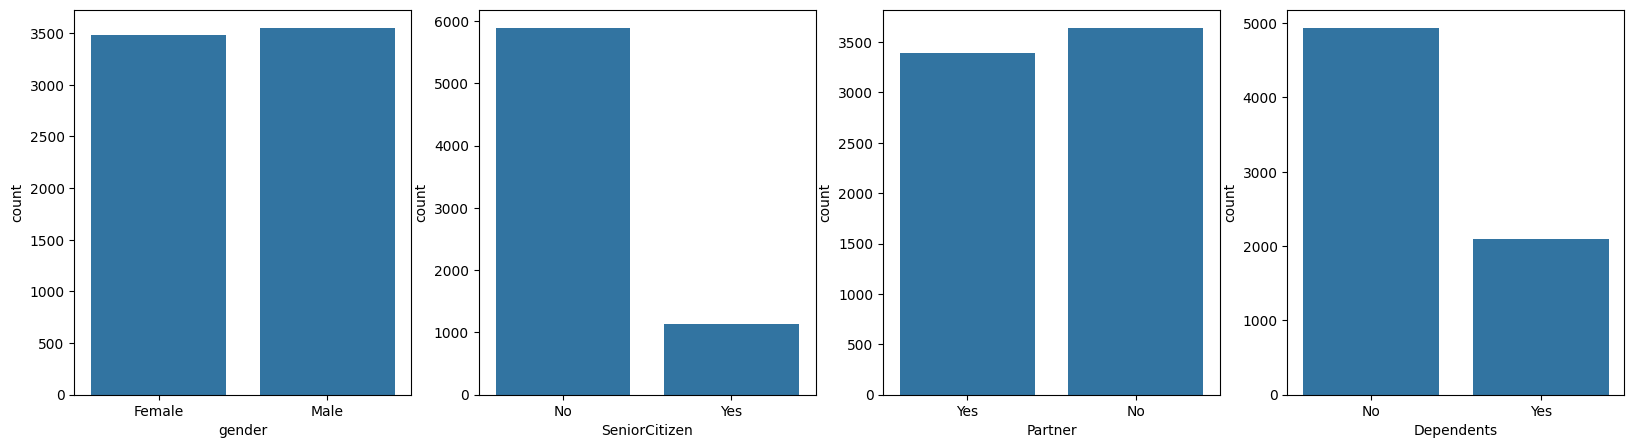

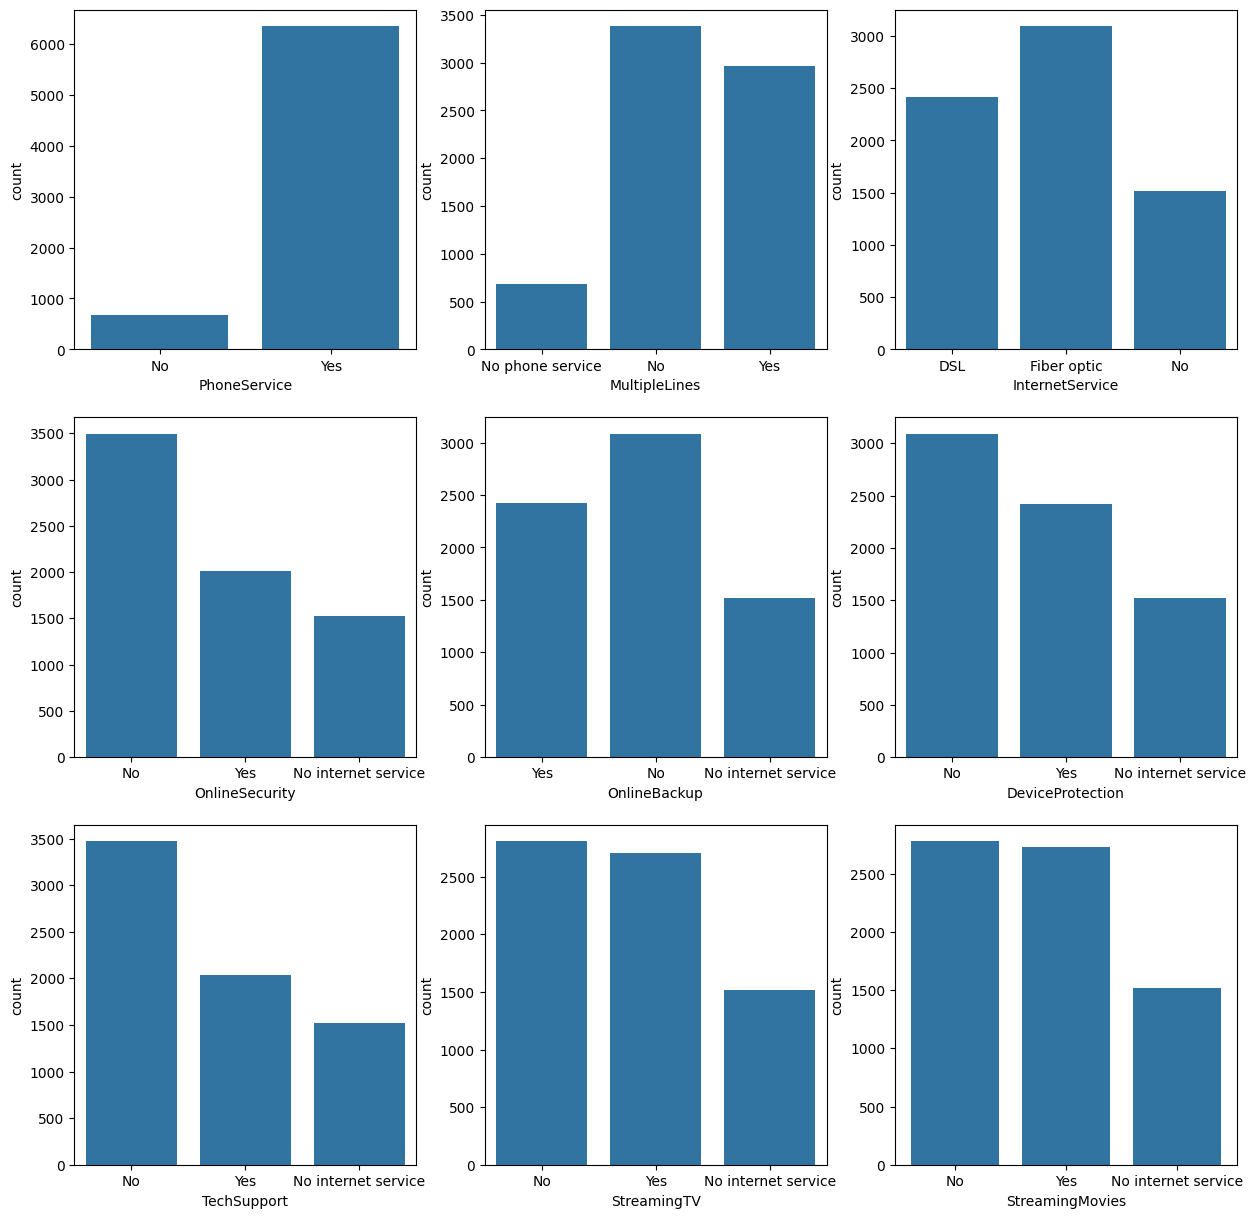

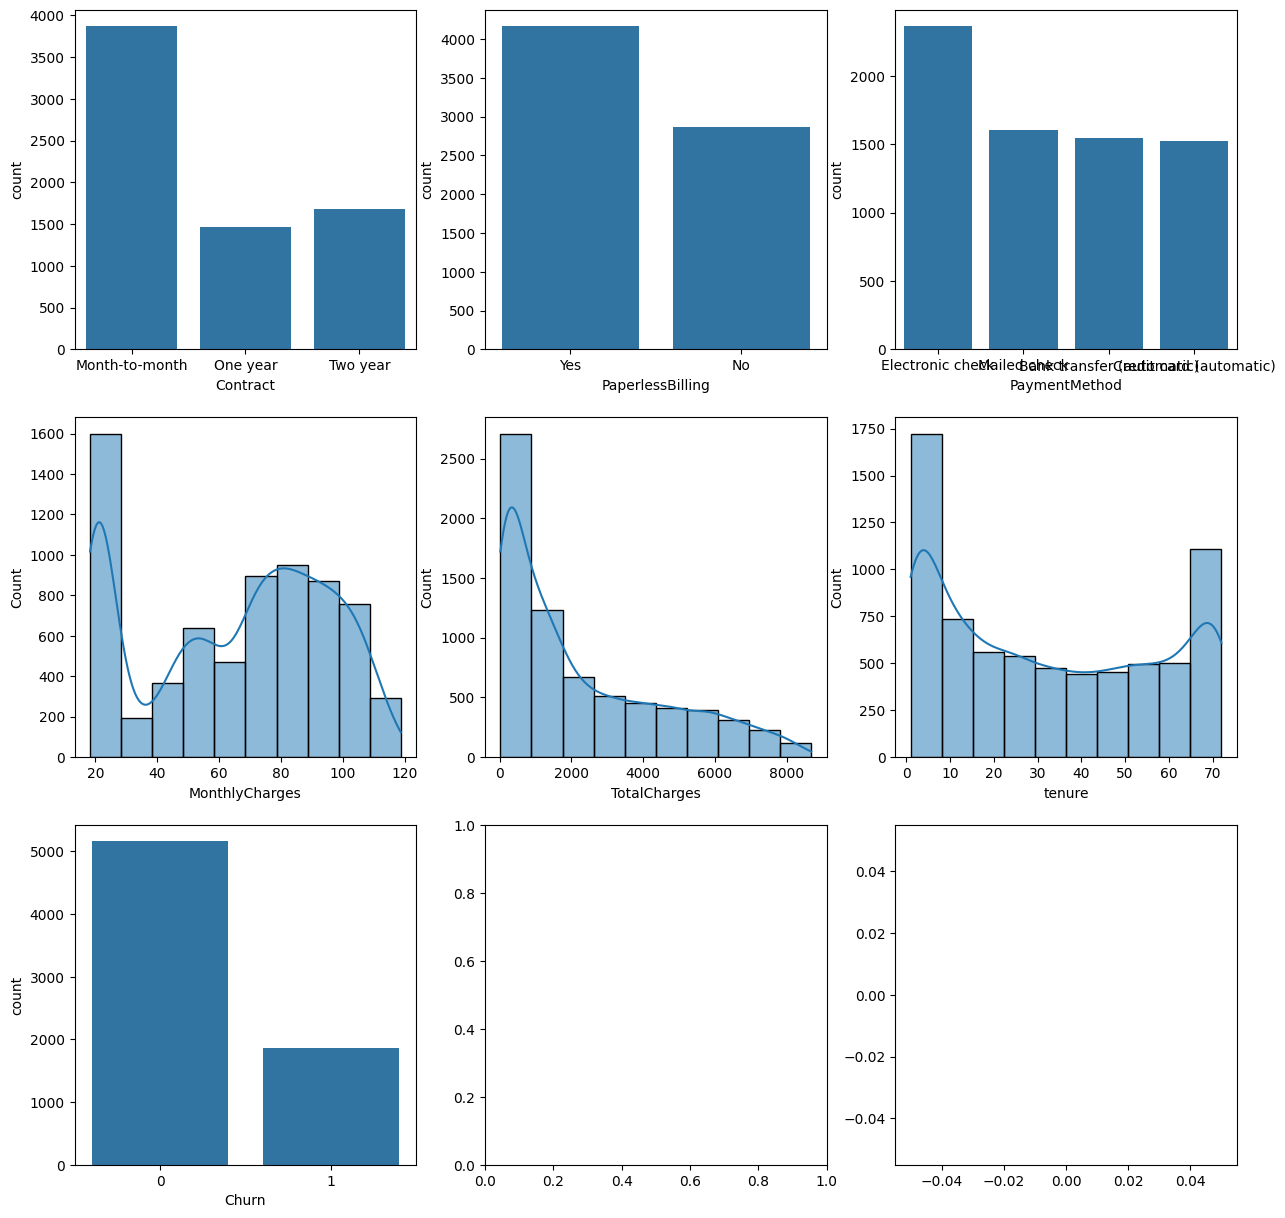

In [9]:
# Dados demográficos
fig, ax = plt.subplots(1, 4, figsize=(20,5))

sns.countplot(x="gender", data=curated_data, ax=ax[0])
sns.countplot(x="SeniorCitizen", data=curated_data, ax=ax[1])
sns.countplot(x="Partner", data=curated_data, ax=ax[2])
sns.countplot(x="Dependents", data=curated_data, ax=ax[3])

_ = plt.plot()

#Dados de serviços
fig, ax = plt.subplots(3, 3, figsize=(15,15))

sns.countplot(x="PhoneService", data=curated_data, ax=ax[0,0])
sns.countplot(x="MultipleLines", data=curated_data, ax=ax[0,1])
sns.countplot(x="InternetService", data=curated_data, ax=ax[0,2])
sns.countplot(x="OnlineSecurity", data=curated_data, ax=ax[1,0])
sns.countplot(x="OnlineBackup", data=curated_data, ax=ax[1,1])
sns.countplot(x="DeviceProtection", data=curated_data, ax=ax[1,2])
sns.countplot(x="TechSupport", data=curated_data, ax=ax[2,0])
sns.countplot(x="StreamingTV", data=curated_data, ax=ax[2,1])
sns.countplot(x="StreamingMovies", data=curated_data, ax=ax[2,2])

_ = plt.plot()

# Dados de contratos
fig, ax = plt.subplots(3, 3, figsize=(15,15))
sns.countplot(x="Contract", data=curated_data, ax=ax[0,0])
sns.countplot(x="PaperlessBilling", data=curated_data, ax=ax[0,1])
sns.countplot(x="PaymentMethod", data=curated_data, ax=ax[0,2])
sns.histplot(curated_data["MonthlyCharges"],bins=10, ax=ax[1,0],kde=True)
sns.histplot(curated_data["TotalCharges"],bins=10, ax=ax[1,1],kde=True)
sns.histplot(curated_data["tenure"],bins=10, ax=ax[1,2],kde=True)
sns.countplot(x="Churn", data=curated_data, ax=ax[2,0])

_ = plt.plot()

In [10]:
prepared_data = pd.get_dummies(curated_data)
prepared_data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


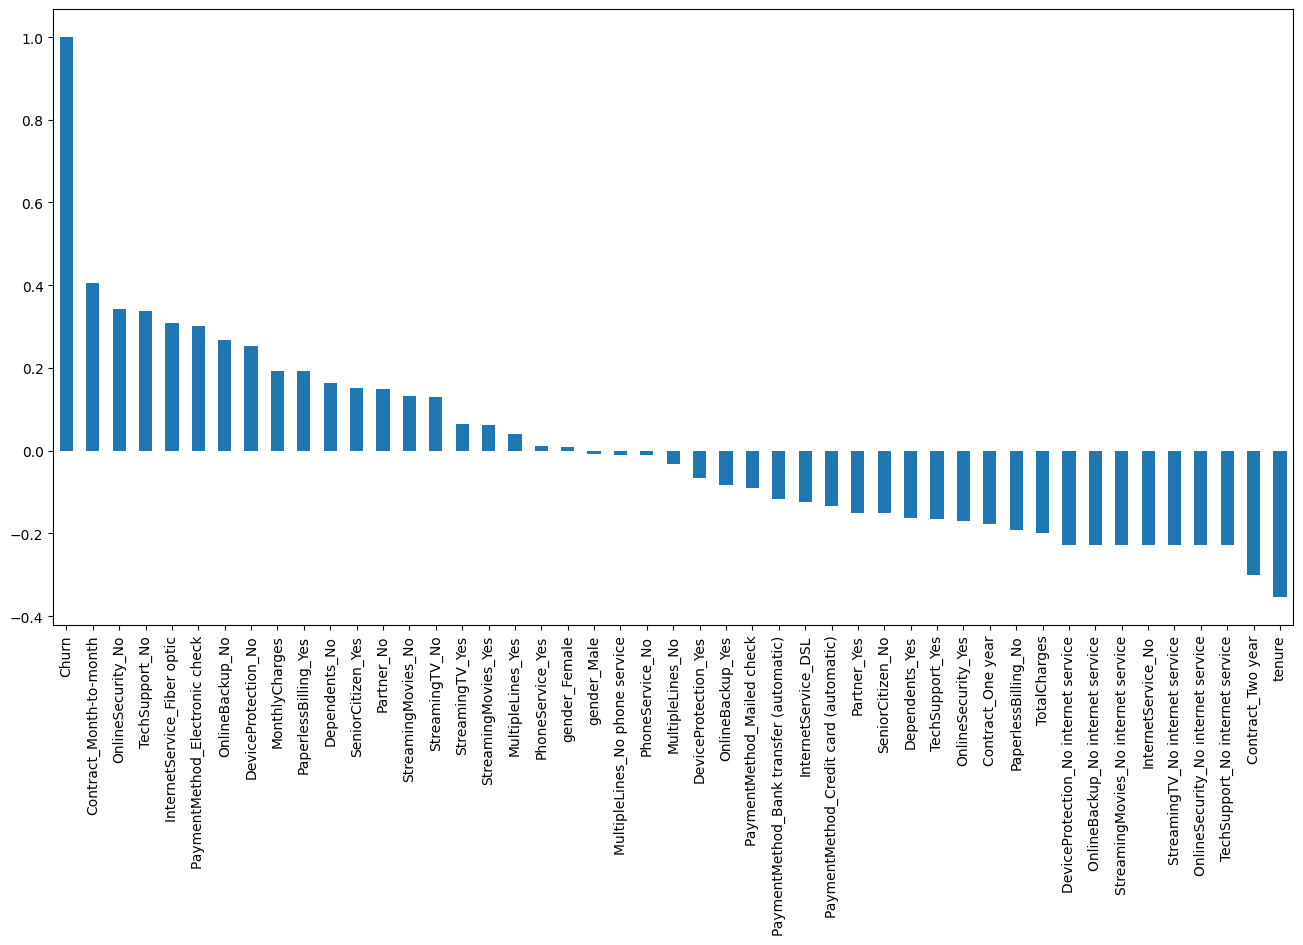

In [11]:
plt.figure(figsize=(16,8))
prepared_data.corr()["Churn"].sort_values(ascending = False).plot(kind="bar")
plt.show()

# DATA PREPARATION (Agrupamento)

A etapa seleção de atributos foi feita de forma iterativa com a etapa de modelagem, utilizando os insights obtidos da fase exploratória para selecionar variáveis com maior correlação com a variável `Churn` e menor correlação entre si. Além disso, levou-se em consideração as características dos grupos encontrados e das figuras de mérito.

Além do tratamento dos dados feito nas etapas anteriores, padronizou-se as variáveis `MonthlyCharges` e `tenure` para não ter um peso excessivo na elaboração dos modelos.

In [12]:
features = ["Churn", "Contract_Month-to-month", "MonthlyCharges", "InternetService_No", "tenure"]
model_data = prepared_data[features].copy()

scaler = StandardScaler()
model_data[["MonthlyCharges", "tenure"]] = scaler.fit_transform(model_data[["MonthlyCharges", "tenure"]])
model_data.head()

,Churn,Contract_Month-to-month,MonthlyCharges,InternetService_No,tenure
0,0,True,-1.161694,False,-1.280248
1,0,False,-0.260878,False,0.064303
2,1,True,-0.363923,False,-1.239504
3,0,False,-0.747850,False,0.512486
4,1,True,0.196178,False,-1.239504


# MODELING (Agrupamento)

Primeiramente, para entender como é o perfil dos clientes associados aos casos de churn, utilizou-se o algoritmo de **k-means** para agrupar aqueles com perfil similar. Para se definir o número ótimo de cluster, utilizou-se o **método do cotovelo**.

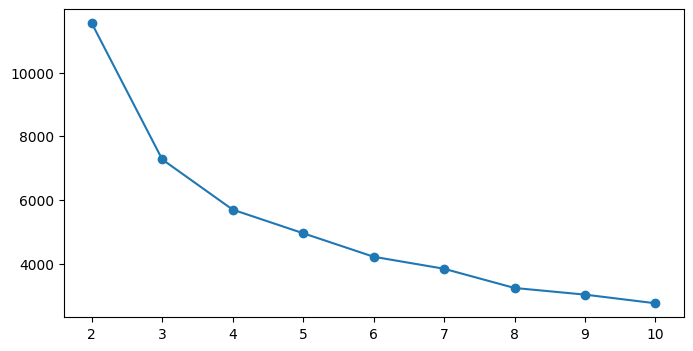

In [13]:
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(model_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, "o-")
plt.show()

In [14]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(model_data)
prepared_data["Cluster"] = kmeans.labels_

In [15]:
clusters = prepared_data[features + ["Cluster"]].groupby("Cluster").mean().reset_index()
clusters = clusters.sort_values(by="Cluster", ascending=True)
clusters[features].style.format("{:.1f}", na_rep="").bar(align=0, color="green")

,Churn,Contract_Month-to-month,MonthlyCharges,InternetService_No,tenure
0,0.1,0.2,87.4,0.0,57.5
1,0.5,0.9,72.1,0.0,12.9
2,0.1,0.4,23.5,0.8,30.5


In [16]:
services = ["OnlineSecurity_Yes", "OnlineBackup_Yes", "DeviceProtection_Yes","TechSupport_Yes", "StreamingTV_Yes", "StreamingMovies_Yes"]

In [17]:
clusters = prepared_data[services + ["Cluster"]].groupby("Cluster").mean().reset_index()
clusters = clusters.sort_values(by="Cluster", ascending=True)
clusters[services].style.format("{:.1f}", na_rep="").bar(align=0, color="green")

,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0.5,0.7,0.7,0.6,0.7,0.7
1,0.2,0.3,0.3,0.2,0.4,0.4
2,0.1,0.0,0.0,0.1,0.0,0.0


# EVALUATION (Agrupamento)

Tendo em vista o perfil de cada cluster caracterizou-se cada grupo como:

0. `Clientes de longa data` - Clientes que estão há mais tempo na empresa e com contratos de mais longo prazo.
1. `Clientes recentes` - Clientes com menos tempo de contrato, cujos contratos são de período mais curto e que assinam menos serviços digitais oferecidos pela empresa.
2. `Clientes sem plano de internet` - Clientes que, em sua maioria, não assinam o serviço de internet e/ou serviços digitais e, portanto, possuem contratos de menor valor mensal.

# DATA PREPARATION (Associação)

Além dos perfis dos clientes, como o plano de internet é assinado por cerca de 80% dos clientes e a maior parte dos serviços estão relacionados a essa variável, a análise de como o consumo dos diferentes serviços estão associados entre si se restringiu aos serviços digitais.

In [18]:
features = ["OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport", "StreamingTV", "StreamingMovies"]

In [19]:
prepared_data = curated_data[curated_data["InternetService"] != "No"]
prepared_data = prepared_data[features]
prepared_data = prepared_data.replace({"Yes": True, "No": False})
prepared_data.head()

/tmp/ipykernel_20592/1259170313.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prepared_data = prepared_data.replace({"Yes": True, "No": False})


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,False,True,False,False,False,False
1,True,False,True,False,False,False
2,True,True,False,False,False,False
3,True,False,True,True,False,False
4,False,False,False,False,False,False


# MODELING (Associação)

Para avaliar como o consumo dos diferentes serviços estão associados entre si, utilizou-se o algoritmo **apriori**. É importante ressaltar que se restringiu a análise para itemsets cujo suporte era sperior a 20%.

In [20]:
min_support = 0.2
max_len = 3

itemsets=apriori(prepared_data, min_support=min_support, use_colnames=True, max_len=max_len)
itemsets.head(10)

,support,itemsets
0,0.365566,(OnlineSecurity)
1,0.439949,(OnlineBackup)
2,0.438679,(DeviceProtection)
3,0.370102,(TechSupport)
4,0.490385,(StreamingTV)
5,0.495464,(StreamingMovies)
6,0.203737,"(OnlineSecurity, OnlineBackup)"
7,0.201016,"(DeviceProtection, OnlineSecurity)"
8,0.238570,"(DeviceProtection, OnlineBackup)"
9,0.208454,"(TechSupport, OnlineBackup)"


In [21]:
rules = association_rules(itemsets, metric='confidence',min_threshold=0.7).round(2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(StreamingMovies),(StreamingTV),0.50,0.49,0.35,0.71,1.45,0.11,1.76,0.61
1,(StreamingTV),(StreamingMovies),0.49,0.50,0.35,0.72,1.45,0.11,1.79,0.61
2,"(DeviceProtection, StreamingMovies)",(StreamingTV),0.29,0.49,0.23,0.79,1.60,0.09,2.38,0.53
3,"(DeviceProtection, StreamingTV)",(StreamingMovies),0.28,0.50,0.23,0.80,1.62,0.09,2.54,0.53


In [22]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"(DeviceProtection, StreamingTV)",(StreamingMovies),0.28,0.50,0.23,0.80,1.62,0.09,2.54,0.53
2,"(DeviceProtection, StreamingMovies)",(StreamingTV),0.29,0.49,0.23,0.79,1.60,0.09,2.38,0.53
0,(StreamingMovies),(StreamingTV),0.50,0.49,0.35,0.71,1.45,0.11,1.76,0.61
1,(StreamingTV),(StreamingMovies),0.49,0.50,0.35,0.72,1.45,0.11,1.79,0.61


# EVALUATION (Associação)

Com alta convicção foi possível observar que:

- A assinatura de Streaming de Filmes é 62% mais comum em casos de clientes que já assinam Streaming de TV e Proteção de dispositivos.
- A assinatura de Streaming de TV é 60% mais comum em casos de clientes que já assinam Streaming de Filmes e Proteção de dispositivos. 
- A assinatura de Streaming de Filmes é 45% mais comum em casos de clientes que já assinam Streaming de TV e vice versa.

# CONCLUSION (Agrupamento + Associação)

Tendo em vista os perfís de cliente encoontrados em volta dos casos de churn e associação dos serviços que são consumidos em conjunto. Mirando evitar novos casos de churn e maximizar a receita, as seguintes ações são propostas.

- Para `clientes recentes` (cluster 1), deve-se estimular a adoção de modelos de contrato mais longo (anual ou bienal)
- Para `clientes sem plano de internet` (cluster 2), deve-se estimular a assinatura de planos internet e serviços digitais.

Isso deve ser feito através de descontos associados a vantagens e pacotes nos serviço digitais, especialmente ofertando aqueles serviços que aumentam a probabilidade da adoção de outros.

# NEXT STEPS

Possíveis próximos passos seriam análises utilizando diferentes variáveis ou com transformações buscando perfis que não necessariamente estão relacionados a casos de churn. Uma análise potencial seria verificar a relação entre variáveis demográficas com o consumo dos diferentes serviços para melhorar as condições oofertadas.